In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_dataset_path = Path('../../data/input/datasets/ACSIncome_USA_2018_binned_imbalanced_16645/ACSIncome_USA_2018_binned_imbalanced_16645.csv').resolve()
df = pd.read_csv(input_dataset_path, sep=';')

In [3]:
df.sample(5)

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
11149,44,Employee of a private for-profit company or bu...,Grade 2,Married,CON-Construction Laborers,Honduras,Reference person,40.0,Male,White alone,[0-20000[
16273,34,Employee of a private for-profit company or bu...,"1 or more years of college credit, no degree",Married,MED-Dietetic Technicians And Ophthalmic Medica...,Michigan/MI,Husband/wife,36.0,Female,White alone,[20000-100000[
13561,46,Employee of a private for-profit company or bu...,Bachelor's degree,Married,MGR-Computer And Information Systems Managers,Canada,Reference person,50.0,Male,White alone,[0-20000[
12428,53,Self-employed in own not incorporated business...,"1 or more years of college credit, no degree",Divorced,ENT-Musicians and Singers,California/CA,Reference person,5.0,Male,White alone,[0-20000[
7040,21,"Local government employee (city, county, etc.)",Grade 10,Never married or under 15 years old,EAT-Cooks,Minnesota/MN,Roomer or boarder,40.0,Male,American Indian alone,[0-20000[


In [4]:
df.shape

(16645, 11)

In [5]:
df.dtypes

AGEP       int64
COW       object
SCHL      object
MAR       object
OCCP      object
POBP      object
RELP      object
WKHP     float64
SEX       object
RAC1P     object
PINCP     object
dtype: object

In [6]:
print(df.isnull().sum())

AGEP     0
COW      0
SCHL     0
MAR      0
OCCP     0
POBP     0
RELP     0
WKHP     0
SEX      0
RAC1P    0
PINCP    0
dtype: int64


In [7]:
df.describe()

,AGEP,WKHP
count,16645.000000,16645.000000
mean,43.518834,38.381015
std,15.349762,13.214905
min,17.000000,1.000000
25%,30.000000,35.000000
50%,43.000000,40.000000
75%,56.000000,44.000000
max,94.000000,99.000000


In [8]:
# Define function to plot box plot
def plot_boxplot(data, column):
    sns.boxplot(data=data, x=column)
    sns.despine()
    plt.show()

# Define function to plot histogram
def plot_histogram(data, column, kde=False):
    sns.histplot(data=data, x=column, kde=kde, color='purple')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    sns.despine()
    plt.show()

# Define function to plot scatter plot
def plot_scatterplot(data, column1, column2):
    sns.scatterplot(data=data, x=column1, y=column2, color='green')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'Scatter plot of {column1} and {column2}')
    sns.despine()
    plt.show()

# Define function to plot correlation heatmap
def plot_heatmap(data):
    sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
    plt.title('Correlation heatmap')
    sns.despine()
    plt.show()

# Define function to plot time-series data
def plot_timeseries(data, date_column, column):
    data[date_column] = pd.to_datetime(data[date_column])
    data.set_index(date_column, inplace=True)
    sns.lineplot(data=data, x=data.index, y=column, color='red')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'Trend of {column} over time')
    sns.despine()
    plt.show()

# Define function to plot count plot
def plot_countplot(data, column):
    sns.countplot(data=data, x=column, palette='pastel')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    sns.despine()
    plt.show()

# Define function to plot pair plot
def plot_pairplot(data, columns):
    sns.pairplot(data=data, vars=columns)
    sns.despine()
    plt.show()

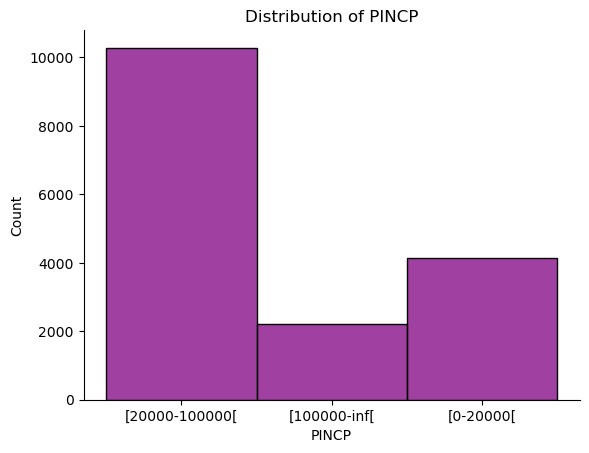

In [9]:
plot_histogram(df, 'PINCP')

In [10]:
from sklearn.preprocessing import OrdinalEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('PINCP')
oe = OrdinalEncoder()
df[categorical_columns] = oe.fit_transform(df[categorical_columns])
df

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,29,1.0,0.0,1.0,281.0,172.0,7.0,40.0,1.0,8.0,[20000-100000[
1,49,0.0,2.0,1.0,260.0,26.0,13.0,80.0,1.0,4.0,[100000-inf[
2,24,0.0,23.0,3.0,181.0,75.0,1.0,40.0,0.0,6.0,[20000-100000[
3,23,0.0,8.0,2.0,336.0,58.0,1.0,40.0,0.0,8.0,[20000-100000[
4,55,0.0,8.0,1.0,90.0,107.0,6.0,40.0,1.0,1.0,[20000-100000[
...,...,...,...,...,...,...,...,...,...,...,...
16640,24,0.0,22.0,2.0,190.0,172.0,13.0,19.0,0.0,8.0,[0-20000[
16641,43,0.0,4.0,0.0,235.0,126.0,17.0,26.0,0.0,8.0,[20000-100000[
16642,44,0.0,22.0,2.0,496.0,79.0,17.0,40.0,1.0,7.0,[20000-100000[
16643,51,5.0,21.0,1.0,196.0,172.0,7.0,35.0,0.0,8.0,[100000-inf[


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(['PINCP'], axis=1)
y = df['PINCP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [12]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
clf = GradientBoostingClassifier(loss='log_loss')
selector = RFECV(clf, verbose=True)
fit = selector.fit(X_train,y_train)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimato